In [1]:
!unrar x "/content/drive/MyDrive/dataset.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/dataset.rar


Would you like to replace the existing file dataset/test/image1/0/1.jpg
  9615 bytes, modified on 2021-10-04 17:49
with a new one
  9615 bytes, modified on 2021-10-04 17:49

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [3]:
import os
from PIL import Image
import numpy as np
import cv2
from skimage import feature
import matplotlib.pyplot as plt

Forming data 

In [11]:
Y=[]
X=[]
for files in os.listdir("dataset/image1/0"):
  image1=cv2.imread(os.path.join("dataset/image1/0",files),0)
  #image1= crop_face(image1)
  image1=  cv2.resize(image1,(32,32))
  image2=cv2.imread(os.path.join("dataset/image2/0",files),0)
  #image2= crop_face(image2)
  image2=cv2.resize(image2,(32,32))
  #image1=image1.flatten()
  #image2=image2.flatten()
  im= np.concatenate((image1,image2))
  X.append(im)
  Y.append(0)
for files in os.listdir("dataset/image1/1"):
  image1=cv2.imread(os.path.join("dataset/image1/1",files),0)
  #image1= crop_face(image1)
  image1=cv2.resize(image1,(32,32))
  image2=cv2.imread(os.path.join("dataset/image2/1",files),0)
  #image2= crop_face(image2)
  image2=cv2.resize(image2,(32,32))
  #image1=image1.flatten()
  #image2=image2.flatten()
  im= np.concatenate((image1,image2))
  X.append(im)
  Y.append(1)

In [12]:
X=np.array(X)
Y=np.array(Y)

In [13]:
X.shape,Y.shape

((6000, 64, 32), (6000,))

Splitting for trainig and testing. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

Testing by Eigen Face

In [ ]:
model = cv2.face.EigenFaceRecognizer_create()
model.train(X_train, y_train)
t=0
f=0
for i in range(0,len(X_test)):
  predictions = model.predict(X_test[i])[0]
  if predictions==y_test[i]:
    t=t+1
  else:
    f=f+1
print((t/(t+f))*100)

Testing by Fisher Face

In [9]:
model = cv2.face.FisherFaceRecognizer_create()
model.train(X_train, y_train)
t=0
f=0
for i in range(0,len(X_test)):
  predictions = model.predict(X_test[i])[0]
  if predictions==y_test[i]:
    t=t+1
  else:
    f=f+1
print((t/(t+f))*100)

error: ignored

Testing by LBPH

In [10]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(X_train,y_train)
t=0
f=0
for i in range(0,len(X_test)):
  predictions = lbph_classifier.predict(X_test[i])[0]
  if predictions==y_test[i]:
    t=t+1
  else:
    f=f+1
print((t/(t+f))*100)

error: ignored

Below codes aren't useful at present. They were tested initially using PCA and LDA and provided an accuracy of 62 and 64 respectively.

In [ ]:
# Support Vector Machine (SVM)

# Importing the libraries
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

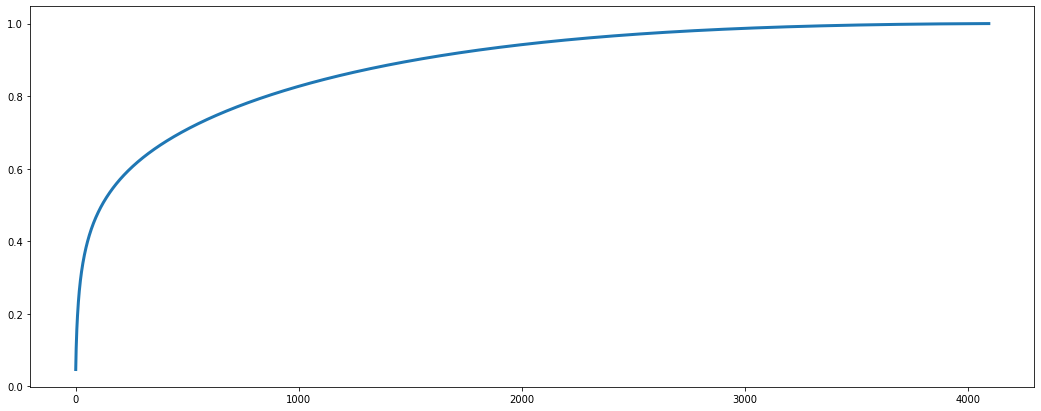

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA().fit(X)
#plt.figure(figsize=(18, 7))
#plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [ ]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = Y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 224)
X = pca.fit_transform(X)

In [ ]:
# Training the SVM model on the Training set
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
from sklearn.svm import SVC
classifier =SVC(kernel ='rbf', random_state=0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = Y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 50)
X_train = lda.fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(100, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
X_test = lda.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[185 128]
 [ 88 199]]


0.64